# Chest X-Ray Images classification

## 1. Introduction
Basing on image and patient data we want to classify into one or multiple classes

## 2. Data
We're working on dataset from Kaggle https://www.kaggle.com/nih-chest-xrays/data.
This NIH Chest X-ray Dataset comprises 112,120 X-ray images with disease labels from 30,805 unique patients. To create these labels, the authors used Natural Language Processing to text-mine disease classifications from the associated radiological reports. The labels are expected to be >90% accurate and suitable for weakly-supervised learning.

### Data limitations:
The image labels are NLP extracted so there could be some erroneous labels but the NLP labeling accuracy is estimated to be >90%.
Very limited numbers of disease region bounding boxes (See BBox_list_2017.csv)
Chest x-ray radiology reports are not anticipated to be publicly shared. Parties who use this public dataset are encouraged to share their “updated” image labels and/or new bounding boxes in their own studied later, maybe through manual annotation
### Class descriptions
There are 15 classes (14 diseases, and one for "No findings"). Images can be classified as "No findings" or one or more disease classes:

Atelectasis
Consolidation
Infiltration
Pneumothorax
Edema
Emphysema
Fibrosis
Effusion
Pneumonia
Pleural_thickening
Cardiomegaly
Nodule Mass
Hernia

In [1]:
import numpy as np
import pandas as pd
import os
from glob import glob
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
image_paths = pd.DataFrame(glob("data/images_*/images/*.png"), columns=["path"])
image_paths["Image Index"] = image_paths["path"].apply(lambda x: x.split("/")[-1]) #verified

In [3]:
all_xray_df = pd.read_csv('data/Data_Entry_2017.csv')

In [4]:
all_xray_df.isna().sum() # verified

Image Index                         0
Finding Labels                      0
Follow-up #                         0
Patient ID                          0
Patient Age                         0
Patient Gender                      0
View Position                       0
OriginalImage[Width                 0
Height]                             0
OriginalImagePixelSpacing[x         0
y]                                  0
Unnamed: 11                    112120
dtype: int64

In [5]:
all_xray_df.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143,NaN
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,NaN
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,NaN
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171,NaN
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143,NaN


In [6]:
all_xray_df = all_xray_df.merge(image_paths, on="Image Index")

In [7]:
all_xray_df.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11,path
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143,NaN,data/images_001/images/00000001_000.png
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,NaN,data/images_001/images/00000001_001.png
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,NaN,data/images_001/images/00000001_002.png
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171,NaN,data/images_001/images/00000002_000.png
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143,NaN,data/images_001/images/00000003_000.png


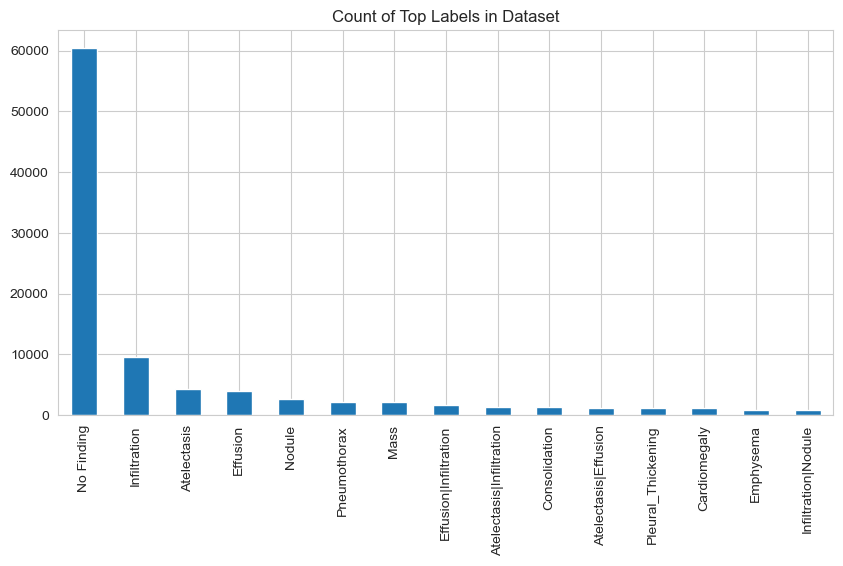

In [8]:
label_counts = all_xray_df['Finding Labels'].value_counts()[:15]

plt.figure(figsize=(10,5))
plt.title("Count of Top Labels in Dataset")
label_counts.plot.bar();

In [9]:
from bitarray import bitarray

# Define the class labels in a sorted set
all_labels = ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'Nodule', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax']
unique_labels = all_labels.copy()

d = {label: ix for ix, label in enumerate(all_labels)}

# Column "Finding Labels" contains multiple label names separated by "|". "No Finding" means no disease.
# Define a function to convert "Finding Labels" to one-hot encoded in one hot encoded vector stored in "Disease Vector". "No Finding" is encoded as all zeros.
def convert_labels_to_vector(labels):
    # split labels by "|"
    labels = labels.split("|")
    # create a bitarray full of False with length of unique_diseases
    vector = bitarray('0'*14)
    # if "No Finding" in labels, return vector
    if "No Finding" in labels:
        return vector
    # for each label in labels, set the corresponding index in vector to 1
    for label in labels:
        vector[d[label]] = 1

    return vector

# Apply convert_labels_to_vector to "Finding Labels" column and store in "Disease Vector" column

In [10]:
all_xray_df['Finding Labels'] = all_xray_df['Finding Labels'].map(lambda x: x.replace('No Finding', ''))
for c_label in all_labels:
    if len(c_label)>1: # leave out empty labels
        all_xray_df[c_label] = all_xray_df['Finding Labels'].map(lambda finding: 1.0 if c_label in finding else 0)

In [11]:
all_xray_df.head() # verified

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,...,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,00000002_000.png,,0,2,81,M,PA,2500,2048,0.171,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
# keep at least 1000 cases
MIN_CASES = 1000
all_labels = [c_label for c_label in all_labels if all_xray_df[c_label].sum() > MIN_CASES]
print('Clean Labels ({})'.format(len(all_labels)),
      [(c_label,int(all_xray_df[c_label].sum())) for c_label in all_labels])

Clean Labels (13) [('Atelectasis', 11559), ('Cardiomegaly', 2776), ('Consolidation', 4667), ('Edema', 2303), ('Effusion', 13317), ('Emphysema', 2516), ('Fibrosis', 1686), ('Infiltration', 19894), ('Mass', 5782), ('Nodule', 6331), ('Pleural_Thickening', 3385), ('Pneumonia', 1431), ('Pneumothorax', 5302)]


In [13]:
# since the dataset is very unbiased, we can resample it to be a more reasonable collection
# weight is 0.1 + number of findings
sample_weights = all_xray_df['Finding Labels'].map(lambda x: len(x.split('|')) if len(x)>0 else 0).values + 4e-2
sample_weights /= sample_weights.sum()
xray_df = all_xray_df.copy()
all_xray_df = all_xray_df.sample(40000, weights=sample_weights)

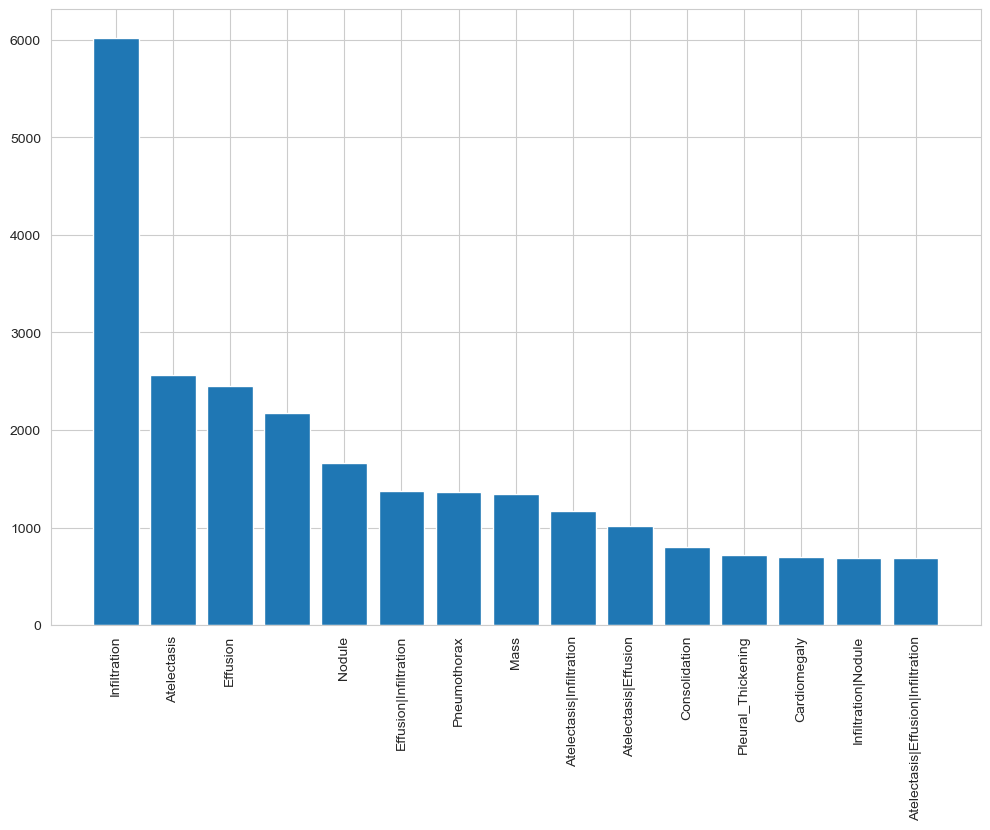

In [14]:
label_counts = all_xray_df['Finding Labels'].value_counts()[:15]
fig, ax1 = plt.subplots(1,1,figsize = (12, 8))
ax1.bar(np.arange(len(label_counts))+0.5, label_counts)
ax1.set_xticks(np.arange(len(label_counts))+0.5)
_ = ax1.set_xticklabels(label_counts.index, rotation = 90)

In [15]:
label_counts = 100*np.mean(all_xray_df[all_labels].values,0)
l_value_counts = sorted(zip(all_labels, label_counts), key=lambda x: x[1], reverse=True)

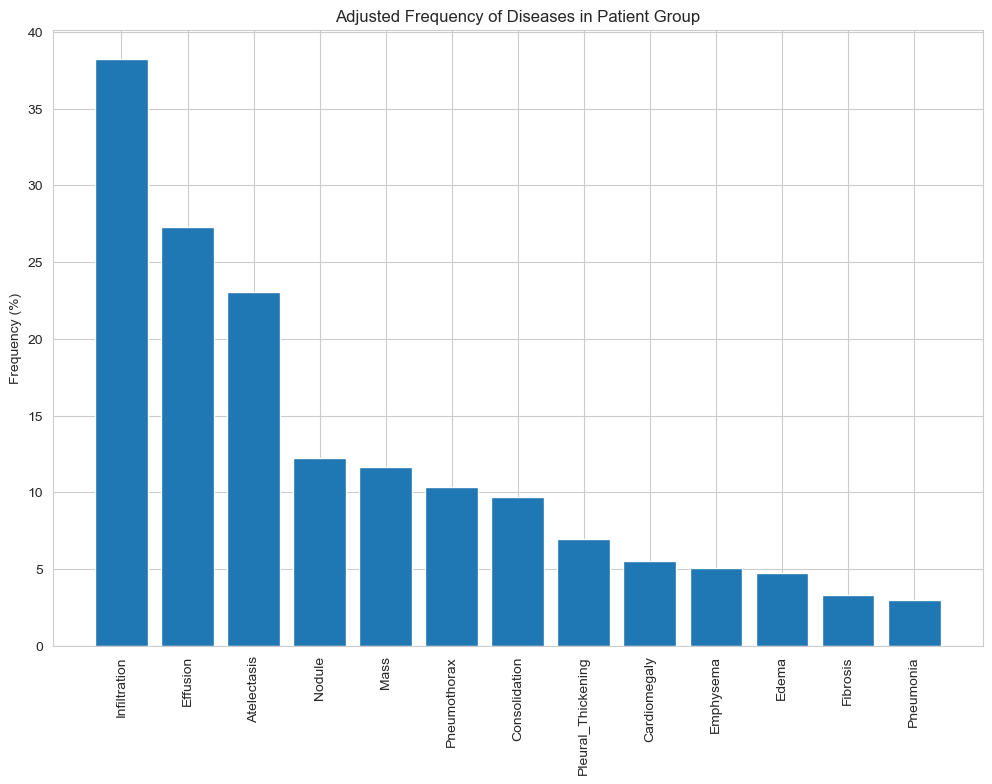

In [16]:
fig, ax1 = plt.subplots(1,1,figsize = (12, 8))
ax1.bar(np.arange(len(label_counts))+0.5, [v[1] for v in l_value_counts])
ax1.set_xticks(np.arange(len(label_counts))+0.5)
ax1.set_xticklabels([v[0] for v in l_value_counts], rotation = 90)
ax1.set_title('Adjusted Frequency of Diseases in Patient Group')
_ = ax1.set_ylabel('Frequency (%)')

In [17]:
all_xray_df['Finding Labels']

52805                 Infiltration
81322                 Infiltration
85768         Atelectasis|Effusion
52380        Effusion|Infiltration
74392     Atelectasis|Infiltration
                    ...           
57322                     Effusion
52443                     Effusion
105780                 Atelectasis
73394                 Pneumothorax
56629                    Emphysema
Name: Finding Labels, Length: 40000, dtype: object

In [18]:
all_xray_df['disease_vec'] = all_xray_df[all_labels].apply(lambda x: np.array(x.values, dtype=np.float32), 1)

In [19]:
from sklearn.model_selection import train_test_split
train_df, valid_df = train_test_split(all_xray_df,
                                      test_size = 0.25,
                                      random_state = 2018,
                                      stratify = all_xray_df['Finding Labels'].map(lambda x: x[:4]))

print('train', train_df.shape[0], 'validation', valid_df.shape[0])

train 30000 validation 10000


In [20]:
os.getcwd()

'/Users/blazej.przybyszewski/Desktop/src/chest-xray-classification'

In [21]:
from keras.preprocessing.image import ImageDataGenerator
IMG_SIZE = (128, 128)
BATCH_SIZE = 32

# this is the augmentation configuration we will use for training
# convert to float32, rescale to [0,1] and normalize to mean 0 and std 1

core_idg = ImageDataGenerator(samplewise_center=True,
                              samplewise_std_normalization=True,
                              horizontal_flip = True,
                              vertical_flip = False,
                              height_shift_range= 0.05,
                              width_shift_range=0.1,
                              rotation_range=5,
                              shear_range = 0.1,
                              fill_mode = 'reflect',
                              zoom_range=0.15)

In [22]:
import tensorflow as tf

# use core_idg to augment the images
train_gen = core_idg.flow_from_dataframe(
    train_df,
    directory=os.getcwd(),
    x_col='path',
    y_col='disease_vec',
    class_mode='raw',
    color_mode='grayscale',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True,
    seed=2018,
)

def convert ():
    for img, label in train_gen:
        yield img, np.vstack(label)

# use train_gen to create Dataset of tuples of converted images and labels to tensorflow tensors
train_dataset = tf.data.Dataset.from_generator(
    convert,
    output_signature=(
        tf.TensorSpec(shape=(32, *IMG_SIZE, 1), dtype=tf.float32),
        tf.TensorSpec(shape=(32, len(all_labels)), dtype=tf.float32))
)

Found 30000 validated image filenames.
Metal device set to: Apple M1 Pro


2023-02-16 11:02:51.766248: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-02-16 11:02:51.766276: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [23]:
def convert ():
    for img, label in train_gen:
       yield img, label

In [24]:
x, y = next(iter(train_dataset))
np.vstack(y)

2023-02-16 11:02:51.791835: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


array([[0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 

In [25]:
import tensorflow as tf
# define cmap that converts color_mode to channel count
cmap = {'rgb': 3, 'grayscale': 1}



# def flow_from_dataframe(img_data_gen, in_df, path_col, y_col, target_size=(128, 128), color_mode='rgb', batch_size=32, shuffle=False, seed=None):
def flow_from_dataframe(img_data_gen, in_df, path_col, y_col, target_size=IMG_SIZE, color_mode='rgb', batch_size=BATCH_SIZE, shuffle=False, seed=None):
    df_gen = img_data_gen.flow_from_dataframe(
        in_df, directory=os.getcwd(),
        x_col=path_col,
        y_col=y_col,
        class_mode='raw',
        batch_size=batch_size,
        target_size=target_size,
        color_mode=color_mode,
        shuffle=shuffle,
        seed=seed
    )

    # Convert to a tf.data.Dataset object
    def data_generator():
        while True:
            x, y = next(df_gen)
            yield x, np.vstack(y)


    train_ds = tf.data.Dataset.from_generator(data_generator,
                                              output_signature=(
                                                    tf.TensorSpec(shape=(batch_size, *target_size, 1), dtype=tf.float32),
                                                    tf.TensorSpec(shape=(batch_size, len(all_labels)), dtype=tf.float32)))

    return train_ds


In [26]:
train_ds = flow_from_dataframe(core_idg, train_df,
                               path_col = 'path',
                               y_col = 'disease_vec',
                               target_size = IMG_SIZE,
                               color_mode = 'grayscale',
                               batch_size = 32)

valid_ds = flow_from_dataframe(core_idg, valid_df,
                               path_col = 'path',
                               y_col = 'disease_vec',
                               target_size = IMG_SIZE,
                               color_mode = 'grayscale',
                               batch_size = 256) # we can use much larger batches for evaluation
# used a fixed dataset for evaluating the algorithm
test_ds = flow_from_dataframe(core_idg, valid_df,
                              path_col = 'path',
                              y_col = 'disease_vec',
                              target_size = IMG_SIZE,
                              color_mode = 'grayscale',
                              batch_size = 1024) # one big batch

testX, test_y = next(iter(test_ds))

Found 30000 validated image filenames.
Found 10000 validated image filenames.
Found 10000 validated image filenames.


In [27]:
type(train_ds)

tensorflow.python.data.ops.dataset_ops.FlatMapDataset

In [30]:
## Creating model

from keras.applications.mobilenet import MobileNet
from keras.layers import GlobalAveragePooling2D, Dense, Dropout
from keras.models import Sequential

base_mobilenet_model = MobileNet(input_shape =  x.shape[1:],
                                 include_top = False, weights = None)
multi_disease_model = Sequential()
multi_disease_model.add(base_mobilenet_model)
multi_disease_model.add(GlobalAveragePooling2D())
multi_disease_model.add(Dropout(0.5))
multi_disease_model.add(Dense(512))
multi_disease_model.add(Dropout(0.5))
multi_disease_model.add(Dense(len(all_labels), activation = 'sigmoid'))
multi_disease_model.compile(optimizer = tf.keras.optimizers.legacy.Adam(), loss = 'binary_crossentropy',
                            metrics = ['binary_accuracy', 'mae'])
multi_disease_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_128 (Functio  (None, 4, 4, 1024)       3228288   
 nal)                                                            
                                                                 
 global_average_pooling2d (G  (None, 1024)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 512)               524800    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 13)                6

In [31]:
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau
weight_path="{}_weights.best.hdf5".format('xray_class')

checkpoint = ModelCheckpoint(weight_path, monitor='val_loss', verbose=1,
                             save_best_only=True, mode='min', save_weights_only = True)

early = EarlyStopping(monitor="val_loss",
                      mode="min",
                      patience=3)
callbacks_list = [checkpoint, early]

In [41]:
import tensorflow as tf
# First round


multi_disease_model.fit(train_ds,
                        steps_per_epoch=100,
                        validation_data = (testX, test_y),
                        epochs = 1,
                        callbacks = callbacks_list)

100/100 [==============================] - ETA: 0s - loss: 0.3448 - binary_accuracy: 0.8715 - mae: 0.1949

2023-02-16 10:58:00.379060: W tensorflow/core/framework/op_kernel.cc:1818] INVALID_ARGUMENT: TypeError: `generator` yielded an element of shape (16, 128, 128, 1) where an element of shape (256, 128, 128, 1) was expected.
Traceback (most recent call last):

  File "/Users/blazej.przybyszewski/mambaforge/envs/chest-xray/lib/python3.8/site-packages/tensorflow/python/ops/script_ops.py", line 271, in __call__
    ret = func(*args)

  File "/Users/blazej.przybyszewski/mambaforge/envs/chest-xray/lib/python3.8/site-packages/tensorflow/python/autograph/impl/api.py", line 642, in wrapper
    return func(*args, **kwargs)

  File "/Users/blazej.przybyszewski/mambaforge/envs/chest-xray/lib/python3.8/site-packages/tensorflow/python/data/ops/dataset_ops.py", line 1076, in generator_py_func
    raise TypeError(

TypeError: `generator` yielded an element of shape (16, 128, 128, 1) where an element of shape (256, 128, 128, 1) was expected.




InvalidArgumentError: Graph execution error:

2 root error(s) found.
  (0) INVALID_ARGUMENT:  TypeError: `generator` yielded an element of shape (16, 128, 128, 1) where an element of shape (256, 128, 128, 1) was expected.
Traceback (most recent call last):

  File "/Users/blazej.przybyszewski/mambaforge/envs/chest-xray/lib/python3.8/site-packages/tensorflow/python/ops/script_ops.py", line 271, in __call__
    ret = func(*args)

  File "/Users/blazej.przybyszewski/mambaforge/envs/chest-xray/lib/python3.8/site-packages/tensorflow/python/autograph/impl/api.py", line 642, in wrapper
    return func(*args, **kwargs)

  File "/Users/blazej.przybyszewski/mambaforge/envs/chest-xray/lib/python3.8/site-packages/tensorflow/python/data/ops/dataset_ops.py", line 1076, in generator_py_func
    raise TypeError(

TypeError: `generator` yielded an element of shape (16, 128, 128, 1) where an element of shape (256, 128, 128, 1) was expected.


	 [[{{node PyFunc}}]]
	 [[IteratorGetNext]]
	 [[IteratorGetNext/_2]]
  (1) INVALID_ARGUMENT:  TypeError: `generator` yielded an element of shape (16, 128, 128, 1) where an element of shape (256, 128, 128, 1) was expected.
Traceback (most recent call last):

  File "/Users/blazej.przybyszewski/mambaforge/envs/chest-xray/lib/python3.8/site-packages/tensorflow/python/ops/script_ops.py", line 271, in __call__
    ret = func(*args)

  File "/Users/blazej.przybyszewski/mambaforge/envs/chest-xray/lib/python3.8/site-packages/tensorflow/python/autograph/impl/api.py", line 642, in wrapper
    return func(*args, **kwargs)

  File "/Users/blazej.przybyszewski/mambaforge/envs/chest-xray/lib/python3.8/site-packages/tensorflow/python/data/ops/dataset_ops.py", line 1076, in generator_py_func
    raise TypeError(

TypeError: `generator` yielded an element of shape (16, 128, 128, 1) where an element of shape (256, 128, 128, 1) was expected.


	 [[{{node PyFunc}}]]
	 [[IteratorGetNext]]
0 successful operations.
0 derived errors ignored. [Op:__inference_test_function_8126]

In [64]:
40000/32

1250.0

In [52]:
train_ds.element_spec

(TensorSpec(shape=(32, 128, 128, 1), dtype=tf.float32, name=None),
 TensorSpec(shape=(32, 13), dtype=tf.float32, name=None))

In [53]:
valid_ds.element_spec

(TensorSpec(shape=(32, 128, 128, 1), dtype=tf.float32, name=None),
 TensorSpec(shape=(32, 13), dtype=tf.float32, name=None))

In [ ]:
test_ds.element_spec